# Notebook 1: synthetic data

*This notebook contains the script for computation and for the visualisation of Figures 1, 2, 3 and 6(section 5.1).*

## Figure 1: 1 pass or 100 passes ? 

In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000
%matplotlib inline

In [2]:
from sgd_lin_na import *

### 1 pass, $n=10^5$

In [3]:
## Synthetic data 
np.random.seed(42)
n = int(1e5)
d = 10

Rdm_M = np.random.randn(d, d)
H_temp = Rdm_M @ Rdm_M.T
diag = np.diag(1 / np.arange(1, d+1)) 
P = np.linalg.eig(H_temp)[1]
H = P @ diag @ P.T
X = np.random.multivariate_normal(np.zeros(d), H, n)

beta_true = np.random.randn(d) 
sigma = 1
y = np.dot(X,beta_true) + sigma*np.random.randn(n)

In [4]:
##Introduction of missing values
# Homogeneous setting
p =0.7
D_init = np.random.binomial(n=1, p=p, size= (n,d))
X_NA = X*D_init

## removing lines which contain only missing values. 
index = D_init.sum(axis=1)!=0
X_NA = X_NA[index,]
X = X[index,]
y = y[index,]
D = D_init[index,]
n,d = X.shape

In [5]:
p_estim = D.sum()/(n*d)
p_estim

0.700621

In [6]:
model = LinearRegressorNA_oracle(X_comp=X,
                                 X=X_NA,
                                 D=D,
                                 y=y,
                                 p=p_estim,
                                 beta_true=beta_true,
                                 strength=0)
L = model.lip_max()

In [7]:
nepoch = 1 #number of passes: 1
beta0 = np.zeros(d)

In [8]:
#SGD
step = 1/(2*L) 
callback_sgd = inspector(model,verbose=False)
beta_sgd = sgdNA(model, 
                 beta0,
                 nepoch, 
                 choice_step = 'sqrt', 
                 step = step, 
                 verbose = False, 
                 callback = callback_sgd,
                 callback_modulo = 100)

In [9]:
#SGD_cst
step = 1/(2*L) 
callback_sgd_cst = inspector(model,verbose=False)
beta_sgd_cst = sgdNA(model, 
                 beta0,
                 nepoch, 
                 choice_step = 'cst', 
                 step = step, 
                 verbose = False, 
                 callback = callback_sgd_cst,
                 callback_modulo = 100)


In [10]:
#AvSGD
step = 1/(2*L)
callback_sgd_av = inspector(model,verbose=False)
beta_sgd_av = avsgdNA(model, 
                 beta0,
                 nepoch, 
                 step = step, 
                 verbose = False, 
                 callback = callback_sgd_av,
                 callback_modulo = 100)

In [11]:
beta_ERM =(np.linalg.pinv(X.T.dot(X)).dot(X.T)).dot(y)
obj = model.loss(beta_ERM)

In [12]:
callbacks=[callback_sgd_cst,callback_sgd,callback_sgd_av]

### 100 passes, $n=10^3$

In [13]:
## Synthetic data 
np.random.seed(42)
n = int(1e3)
d = 10

Rdm_M = np.random.randn(d, d)
H_temp = Rdm_M @ Rdm_M.T
diag = np.diag(1 / np.arange(1, d+1)) 
P = np.linalg.eig(H_temp)[1]
H = P @ diag @ P.T
X = np.random.multivariate_normal(np.zeros(d), H, n)

beta_true = np.random.randn(d) 
sigma = 1
y = np.dot(X,beta_true) + sigma*np.random.randn(n)

In [14]:
##Introduction of missing values
# Homogeneous setting
p = 0.7
D_init = np.random.binomial(n=1, p=p, size= (n,d))
X_NA = X*D_init

## removing lines which contain only missing values. 
index = D_init.sum(axis=1)!=0
X_NA = X_NA[index,]
X = X[index,]
y = y[index,]
D = D_init[index,]
n,d = X.shape

In [15]:
p_estim = D.sum()/(n*d)

In [16]:
model = LinearRegressorNA_oracle(X_comp=X,
                                 X=X_NA,
                                 D=D,
                                 y=y,
                                 p=p_estim,
                                 beta_true=beta_true,
                                 strength=0)
L = model.lip_max()

In [17]:
nepoch = 100 #number of passes: 100
beta0 = np.zeros(d)

In [18]:
#SGD
step = 1/(2*L) 
callback_sgd_hundred = inspector(model,verbose=False)
beta_sgd_hundred = sgdNA(model, 
                         beta0,
                         nepoch, 
                         choice_step="sqrt", 
                         step=step, verbose=False, 
                         callback=callback_sgd_hundred)

In [19]:
#SGD_cst
step = 1/(2*L) 
callback_sgd_cst_hundred = inspector(model,verbose=False)
beta_sgd_cst_hundred = sgdNA(model, 
                             beta0, 
                             nepoch, 
                             choice_step="cst", 
                             step=step, verbose=False, 
                             callback=callback_sgd_cst_hundred)

In [20]:
#AvSGD
step = 1/(2*L)
callback_sgd_av_hundred = inspector(model,verbose=False)
beta_sgd_av_hundred = avsgdNA(model, 
                              beta0,
                              nepoch, 
                              step=step, 
                              verbose=False, 
                              callback=callback_sgd_av_hundred)

In [21]:
beta_ERM =(np.linalg.pinv(X.T.dot(X)).dot(X.T)).dot(y)
obj_hundred = model.loss(beta_ERM)

In [22]:
callbacks_hundred = [callback_sgd_cst_hundred,callback_sgd_hundred,callback_sgd_av_hundred]
names = ["SGD_cst","SGD","AvSGD"]

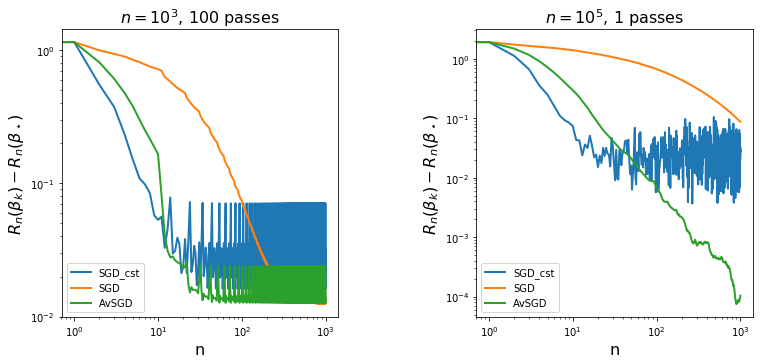

In [23]:
figure = plt.figure(figsize=(12, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0)
axes = figure.add_subplot(1, 2, 1)


for callback, name in zip(callbacks_hundred, names):
    objectives = np.array(callback.objectives) 
    objectives_dist = objectives - obj_hundred
    axes.plot(objectives_dist, label=name, lw=2)

axes.set_yscale("log")
axes.set_xscale("log")

axes.set_xlabel('n',fontsize=16) 
axes.set_ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
axes.legend(loc='lower left')
axes.set_title(r"$n=10^{3}$, 100 passes", fontsize=16)

axes = figure.add_subplot(1, 2, 2)

for callback, name in zip(callbacks, names):
    objectives = np.array(callback.objectives)
    objectives_dist = objectives - obj
    axes.plot(objectives_dist, label=name, lw=2)
    
axes.set_yscale("log")
axes.set_xscale("log")
axes.set_xlabel('n',fontsize=16) 
axes.set_ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
axes.set_title(r"$n=10^{5}$, 1 passes", fontsize=16)
axes.legend(loc='lower left')
plt.show()

## Figure 2: estimating $L$ or not

In [24]:
## Synthetic data 
np.random.seed(42)
n = int(1e5)
d = 10

Rdm_M = np.random.randn(d, d)
H_temp = Rdm_M @ Rdm_M.T
diag = np.diag(1 / np.arange(1, d+1)) 
P = np.linalg.eig(H_temp)[1]
H = P @ diag @ P.T
X = np.random.multivariate_normal(np.zeros(d), H, n)

beta_true = np.random.randn(d) 
sigma = 1
y = np.dot(X,beta_true) + sigma*np.random.randn(n)

In [25]:
##Introduction of missing values
# Homogeneous setting 
p = 0.7
D_init = np.random.binomial(n=1, p=p, size= (n,d))
X_NA = X*D_init

## removing lines which contain only missing values. 
index = D_init.sum(axis=1)!=0
X_NA = X_NA[index,]
X = X[index,]
y = y[index,]
D = D_init[index,]
n,d = X.shape

In [26]:
p_estim = D.sum()/(n*d)

In [27]:
model = LinearRegressorNA_oracle(X_comp=X,
                                 X=X_NA,
                                 D=D,
                                 y=y,
                                 p=p_estim,
                                 beta_true=beta_true,
                                 strength=0)

### Estimating L

In [28]:
L = model.lip_max()
print(L)

53.03709367437547


In [29]:
nepoch = 1 #number of passes: 1
beta0 = np.zeros(d)

In [30]:
#SGD
import time
step = 1/(2*L) 
callback_sgd = inspector(model,verbose=False)
start = time.time()
beta_sgd = sgdNA(model, 
                 beta0,
                 nepoch, 
                 choice_step="sqrt", 
                 step=step, 
                 verbose=False, 
                 callback=callback_sgd)
print(time.time()-start)

4.578751087188721


In [31]:
# SGD_cst
step = 1/(2*L) 
callback_sgd_cst = inspector(model,verbose=False)
beta_sgd_cst = sgdNA(model, 
                     beta0 , 
                     nepoch,
                     choice_step="cst", 
                     step=step, 
                     verbose=False, 
                     callback=callback_sgd_cst)

In [32]:
#AvSGD
step = 1/(2*L)
callback_sgd_av = inspector(model,verbose=False)
start = time.time()
beta_sgd_av = avsgdNA(model, 
                      beta0 , 
                      nepoch,
                      step=step, 
                      verbose=False, 
                      callback=callback_sgd_av)
cpu_av_100 = time.time()-start
print(cpu_av_100)

4.746155023574829


In [33]:
beta_ERM =(np.linalg.pinv(X.T.dot(X)).dot(X.T)).dot(y)
obj = model.loss(beta_ERM)

In [34]:
callbacks = [callback_sgd_cst,callback_sgd,callback_sgd_av]

### $L$ supposed as known

In [35]:
L_oracle = model.lip_max_theo()
print(L_oracle)

42.36686740188435


In [36]:
nepoch = 1 #number of passes: 1
beta0 = np.zeros(d)

In [37]:
# SGD
step = 1/(2*L_oracle) 
callback_sgd_oracle = inspector(model,verbose=False)
beta_sgd_oracle = sgdNA(model, 
                             beta0 ,
                             nepoch,
                             choice_step="sqrt", 
                             step=step, 
                             verbose=False, 
                             callback=callback_sgd_oracle)

In [38]:
# SGD_cst
step = 1/(2*L_oracle) 
callback_sgd_cst_oracle = inspector(model,verbose=False)
beta_sgd_cst_oracle = sgdNA(model, 
                            beta0,
                            nepoch,
                            choice_step="cst", 
                            step=step, 
                            verbose=False, 
                            callback=callback_sgd_cst_oracle)

In [39]:
#AvSGD
step = 1/(2*L_oracle)
callback_sgd_av_oracle = inspector(model,verbose=False)
beta_sgd_av_oracle = avsgdNA(model, 
                             beta0, 
                             nepoch, 
                             step=step, 
                             verbose=False, 
                             callback=callback_sgd_av_oracle)

In [40]:
callbacks_oracle = [callback_sgd_cst_oracle,callback_sgd_oracle,callback_sgd_av_oracle]
names = ["SGD_cst","SGD","AvSGD"]

''

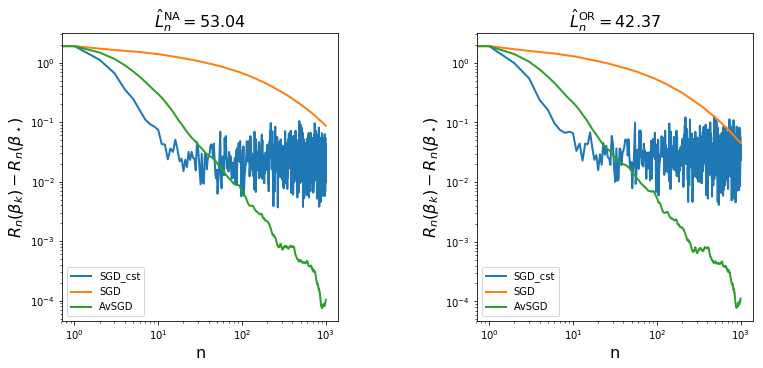

In [41]:
figure = plt.figure(figsize=(12, 5))
plt.gcf().subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0)
axes = figure.add_subplot(1, 2, 1)


for callback, name in zip(callbacks, names):
    objectives = np.array(callback.objectives) 
    objectives_dist = objectives - obj
    axes.plot(objectives_dist, label=name, lw=2)

axes.set_yscale("log")
axes.set_xscale("log")
axes.set_xlabel('n',fontsize=16) 
axes.set_ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
axes.set_title(r"$\hat{L}_n^\mathrm{NA}=$"+str(round(L,2)), fontsize=16)
axes.legend(loc='lower left')

axes = figure.add_subplot(1, 2, 2)

for callback, name in zip(callbacks_oracle, names):
    objectives = np.array(callback.objectives)
    objectives_dist = objectives - obj
    axes.plot(objectives_dist, label=name, lw=2)
    
axes.set_yscale("log")
axes.set_xscale("log")
axes.set_xlabel('n',fontsize=16) 
axes.set_ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
axes.set_title(r"$\hat{L}_n^\mathrm{OR}=$"+str(round(L_oracle,2)), fontsize=16)
axes.legend(loc='lower left')
;

## Figure 3: homogeneous versus heterogeneous MCAR mechanism

In [42]:
## Synthetic data 
np.random.seed(42)
n = int(1e5)
d = 10

Rdm_M = np.random.randn(d, d)
H_temp = Rdm_M @ Rdm_M.T
diag = np.diag(1 / np.arange(1, d+1)) 
P = np.linalg.eig(H_temp)[1]
H = P @ diag @ P.T
X = np.random.multivariate_normal(np.zeros(d), H, n)

beta_true = np.random.randn(d) 
sigma = 1
y = np.dot(X,beta_true) + sigma*np.random.randn(n)

In [43]:
##Introduction of missing values
# Heterogeneous setting
p = [0.6, 0.7, 0.8, 0.8, 0.9, 0.7, 0.9, 0.6, 0.9, 0.8]
D_init = np.zeros((n,d))
for j in range(0,d):
    D_init[:,j] = np.random.binomial(n=1, p=p[j], size= n)
X_NA = X*D_init
    
## removing lines which contain only missing values. 
index = D_init.sum(axis=1)!=0
X_NA = X_NA[index,]
X = X[index,]
y = y[index,]
D = D_init[index,]
n,d = X.shape

### Homogeneous

In [44]:
p_homo = D.sum()/(n*d)
p_homo

0.770389

In [45]:
model = LinearRegressorNA_oracle(X_comp=X,
                                 X=X_NA,
                                 D=D,
                                 y=y,
                                 p=p_homo,
                                 beta_true=beta_true,
                                 strength=0)
L = model.lip_max()

In [46]:
nepoch = 1 #number of passes: 1
beta0 = np.zeros(d)

In [47]:
#AvSGD
step = 1/(2*L)
callback_sgd_av = inspector(model,verbose=False)
beta_sgd_av = avsgdNA(model, 
                      beta0,
                      nepoch,
                      step=step, 
                      verbose=False,
                      callback=callback_sgd_av)

In [48]:
beta_ERM =(np.linalg.pinv(X.T.dot(X)).dot(X.T)).dot(y)
obj = model.loss(beta_ERM)

### Heterogenous

<Container object of 3 artists>

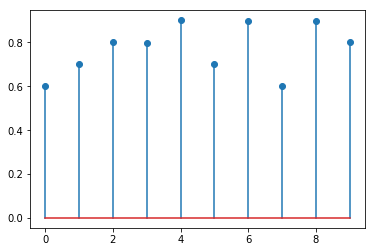

In [49]:
p_estim = np.sum(D,axis=0)/D.shape[0]
plt.stem(p_estim)

In [50]:
model = LinearRegressorNA_oracle(X_comp=X,
                                 X=X_NA,
                                 D=D,
                                 y=y,
                                 p=p_estim,
                                 beta_true=beta_true,
                                 strength=0)
L = model.lip_max()

In [51]:
nepoch = 1 #number of passes: 1
beta0 = np.zeros(d)

In [52]:
#AvSGD
step = 1/(2*L)
callback_sgd_av_heter = inspector(model,verbose=False)
beta_sgd_av_heter = avsgdNA(model, 
                            beta0,
                            nepoch,
                            step=step, 
                            verbose=False,
                            callback=callback_sgd_av_heter)

In [53]:
beta_ERM=(np.linalg.pinv(X.T.dot(X)).dot(X.T)).dot(y)
obj_heter = model.loss(beta_ERM)

''

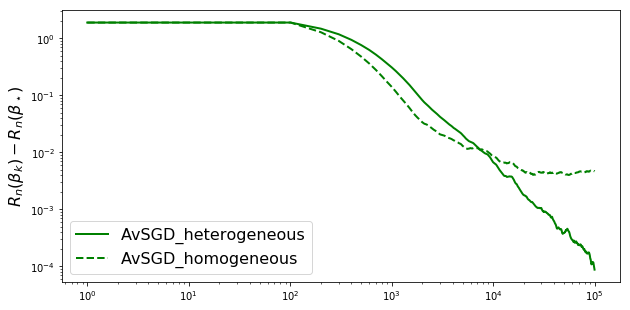

In [54]:
plt.figure(figsize=(10, 5))
obj_hetero = callback_sgd_av_heter.objectives - obj
absc = np.arange(1,n+2,100)
plt.loglog(absc,obj_hetero, label="AvSGD_heterogeneous", lw=2, color="g")
obj_homo = np.array(callback_sgd_av.objectives) - obj
plt.loglog(absc,obj_homo, label="AvSGD_homogeneous", lw=2, color="g", linestyle="dashed")
plt.ylabel(r"$\||\beta_k-\beta_\star\||^2$", fontsize=16)
plt.ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
plt.legend(loc='lower left', fontsize=16)
;

## Figure 6: polynomial features

In [55]:
## Synthetic data 
np.random.seed(42)
n = int(1e5)
d = 3
Rdm_M = np.random.randn(d-1, d-1)
H_temp = Rdm_M @ Rdm_M.T
diag = np.diag(1 / np.arange(1, d))*0.1
P = np.linalg.eig(H_temp)[1]
H = P @ diag @ P.T
X = np.random.multivariate_normal(np.zeros(d-1), H, n)
X = X**2
X = np.concatenate((X, np.transpose(np.array([X[:,0]*X[:,1]]))), axis=1)

beta_true = np.random.randn(d)
sigma = 0.1
y = np.dot(X,beta_true) + sigma*np.random.randn(n)

In [56]:
##Introduction of missing values

# Heterogenous setting
p = [0.9,0.6]
D_init = np.zeros((n,d-1))
for j in range(0,d-1):
    D_init[:,j] = np.random.binomial(n=1, p=p[j], size= n)
D_init = np.concatenate((D_init, np.transpose(np.array([D_init[:,0]*D_init[:,1]]))), axis=1)

X_NA = X*D_init
index = D_init.sum(axis=1)!=0
X_NA = X_NA[index,]
X = X[index,]
y = y[index,]
D = D_init[index,]
n,d = X.shape

In [57]:
# polynomial features -------------------
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')
X_poly = poly.fit_transform(X)
beta_ERM = (np.linalg.pinv(X_poly.T.dot(X_poly)).dot(X_poly.T)).dot(y)

print("The number of variables is now ") 
print(X_poly.shape[1])

The number of variables is now 
10


<Container object of 3 artists>

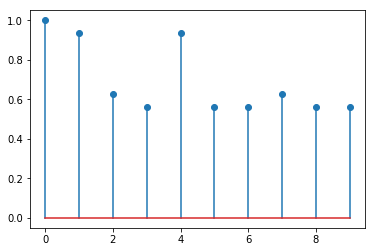

In [58]:
# Mask for polynomial features 
D_poly = poly.fit_transform(D)
X_poly_NA = X_poly*D_poly

p_estim = np.sum(D_poly,axis=0)/D_poly.shape[0]
plt.stem(p_estim)

In [59]:
model = LinearRegressorNA_oracle(X_comp=X_poly,
                                 X=X_poly_NA,
                                 D=D_poly,
                                 y=y,
                                 p=p_estim,
                                 beta_true=beta_ERM,
                                 strength=0)
L = model.lip_max()

In [60]:
nepoch = 1
beta0 = np.zeros(X_poly_NA.shape[1])

In [61]:
step = 1/(2*L)
callback_sgd_av = inspector(model,verbose=False)
beta_sgd_av = avsgdNA(model, 
                      beta0,
                      nepoch,
                      step=step,
                      verbose=False,
                      callback=callback_sgd_av)

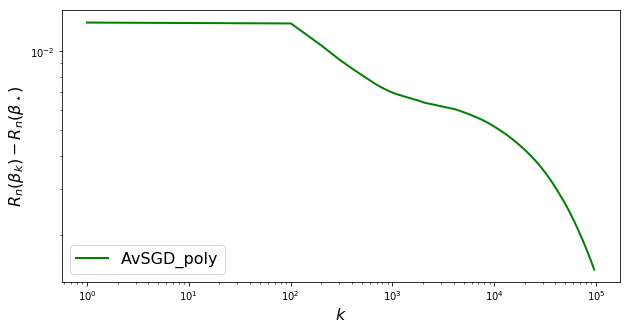

In [62]:
plt.figure(figsize=(10, 5))
obj = callback_sgd_av.objectives - model.loss(beta_ERM)
absc = np.arange(1,n+100,100)
plt.loglog(absc,obj, label="AvSGD_poly", lw=2, color="g")
plt.xlabel(r'$k$',fontsize=16)
plt.ylabel(r"$R_n(\beta_k)-R_n(\beta_\star)$", fontsize=16)
plt.legend(loc='lower left',fontsize=16)